In [1]:
from tensorflow import keras
import random
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
rand_num = random.randint(0,60000)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
chosen_x,chosen_y = x_train[rand_num],y_train[rand_num]

Text(0.5, 1.0, 'Label: 3')

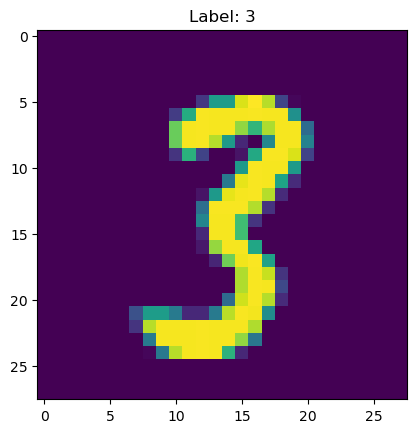

In [9]:
plt.imshow(chosen_x)
plt.title("Label: " + str(chosen_y))

# Prepare the data before working on them

In [10]:
#Normalizing the images
x_train = (x_train/255) - 0.5
x_test = (x_test/255) - 0.5

#Reshape the images for Keras
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [11]:
(x_train.shape,x_test.shape)

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
(y_train.shape, y_test.shape)

((60000,), (10000,))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, ReLU, Dropout, Softmax
from tensorflow.keras.utils import to_categorical

In [14]:
model = Sequential()
model.add(Conv2D(8,kernel_size=(3,3),padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,kernel_size=(3,3),padding='same', activation='relu', input_shape=(14, 14, 8)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu', input_shape=(7, 7, 16)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(10,activation='softmax'))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 1568)              0

In [16]:
#Compiling the model
model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [17]:
#Training the above model
model.fit(
  x_train,
  y_train,
  epochs=10,
  validation_data=(x_test, y_test)
)

Epoch 1/10


1875/1875 [==============================] - 11s 5ms/step - loss: 0.1859 - acc: 0.9420 - val_loss: 0.0475 - val_acc: 0.9852
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0556 - acc: 0.9829 - val_loss: 0.0429 - val_acc: 0.9857
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0407 - acc: 0.9871 - val_loss: 0.0330 - val_acc: 0.9893
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0305 - acc: 0.9905 - val_loss: 0.0321 - val_acc: 0.9901
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0258 - acc: 0.9917 - val_loss: 0.0342 - val_acc: 0.9887
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0214 - acc: 0.9928 - val_loss: 0.0262 - val_acc: 0.9914
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0193 - acc: 0.9938 - val_loss: 0.0313 - val_acc: 0.9898
Epoch 8/10
1875/1875 [==============================

In [19]:
model.save_weights('cnn.h5') #saving the model to local disk

In [27]:
# Predict on the first 5 test images.
predictions = model.predict(x_test[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(y_test[:5]) # [7, 2, 1, 0, 4]

1/1 [==============================] - 0s 24ms/step
[7 2 1 0 4]
[7 2 1 0 4]


In [28]:
loss = [0.1859,0.0556,0.0407,0.0305,0.0258,0.0214,0.0193,0.0164,0.0141,0.0127]
epoch = [i for i in range(1,11)]

In [30]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss')

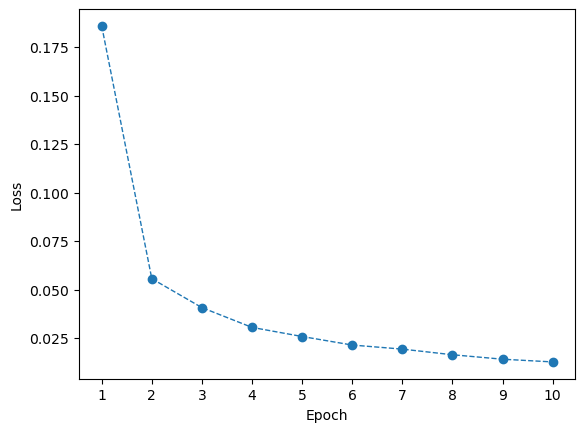

In [38]:
plt.plot(epoch,loss,ls="--",marker="o",linewidth=1)
plt.xticks(ticks=epoch)
plt.xlabel("Epoch")
plt.ylabel("Loss")